In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("C:\\Users\\Lenovo\\Downloads\\loan_sanction_test.csv")

In [11]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [13]:
# Check for missing values
print("Missing values before handling:")
print(df.isnull().sum())



Missing values before handling:
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [15]:
# Handle missing values (safe way)
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

# Recheck missing values
print(df.isnull().sum())


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [17]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,135.980926,342.822888,0.839237
std,4910.685399,2334.232099,60.959739,64.658402,0.367814
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


 UNIVARIATE ANALYSIS


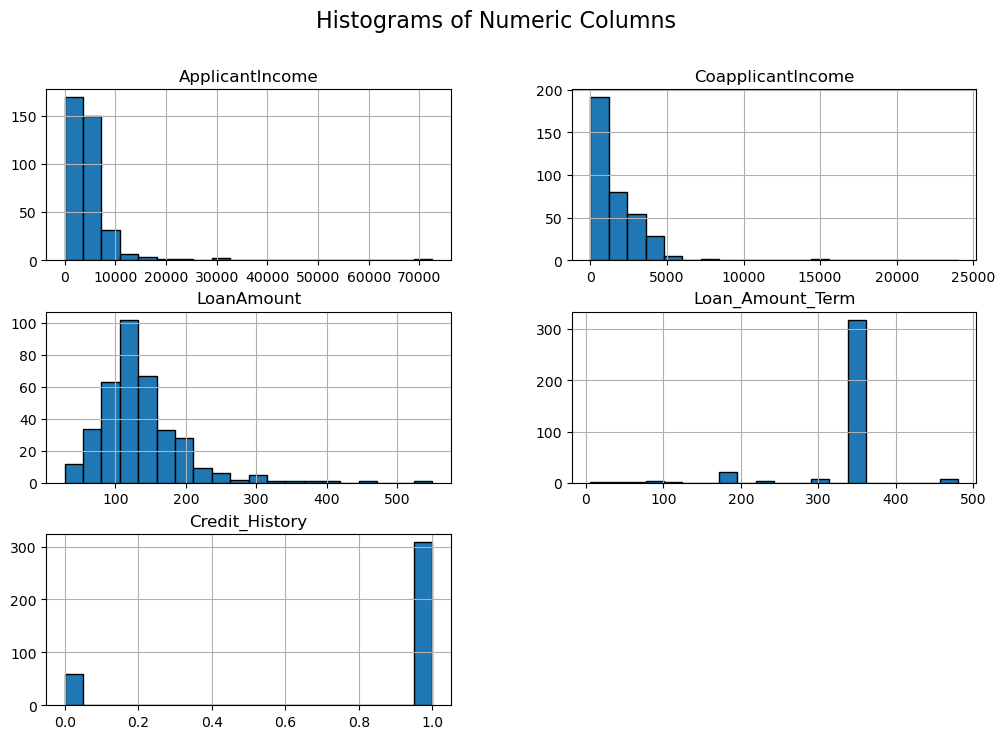

In [20]:

# ---------- 1. Histograms for numeric columns ----------
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numeric_cols].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numeric Columns", fontsize=16)
plt.show()



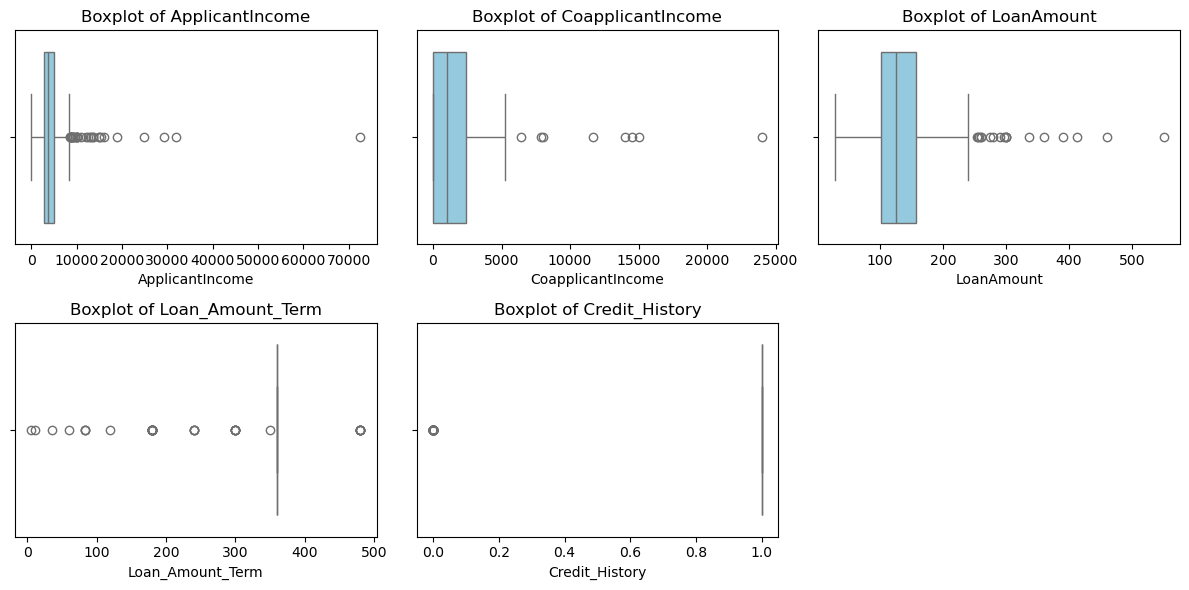

In [21]:
# ---------- 2. Box Plots for numeric columns ----------
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3492\632173725.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3492\632173725.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3492\632173725.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3492\632173725.py:7: FutureWarning: 

Passing `palette` without 

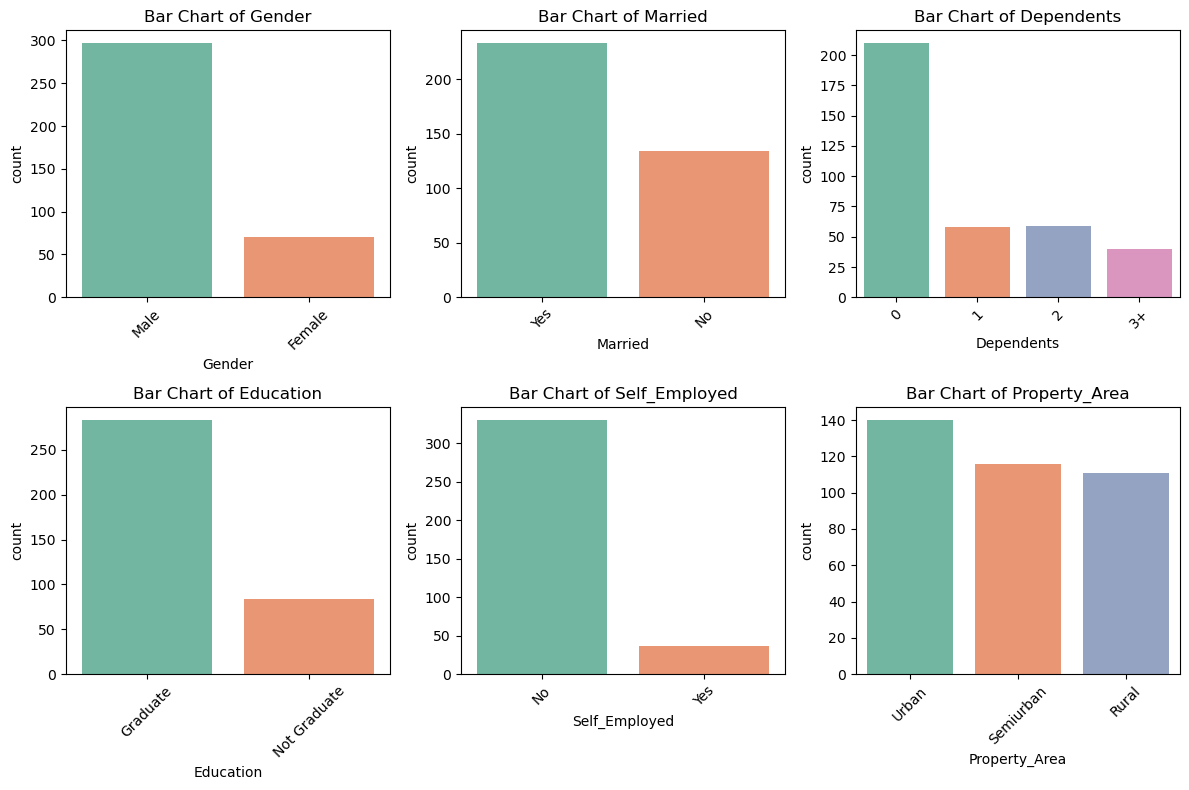

In [22]:
# ---------- 3. Bar Charts for categorical columns ----------
categorical_cols = df.select_dtypes(include=['object']).columns.drop('Loan_ID')

plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f"Bar Chart of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



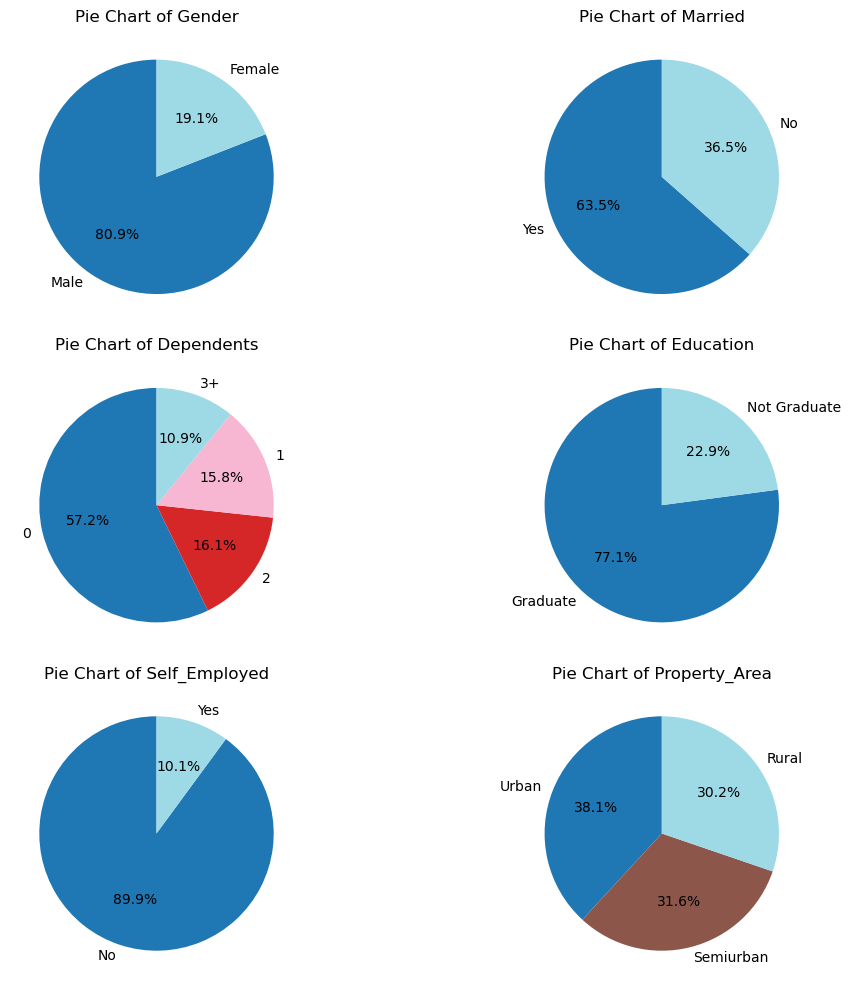

In [23]:
# ---------- 4. Pie Charts for categorical columns ----------
plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap="tab20")
    plt.title(f"Pie Chart of {col}")
    plt.ylabel("")
plt.tight_layout()
plt.show()


BIVARIATE ANALYSIS


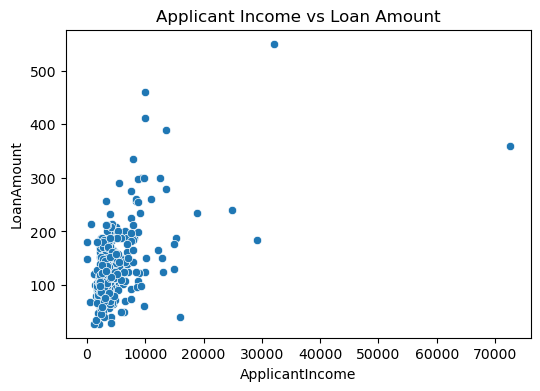

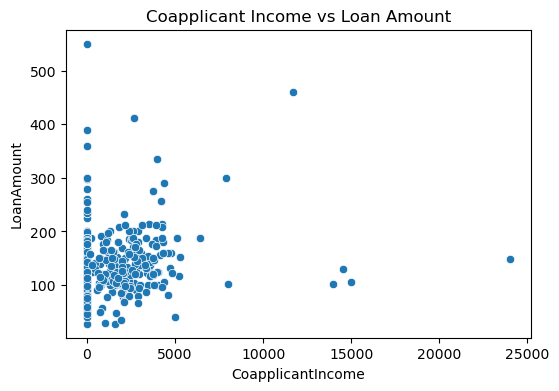

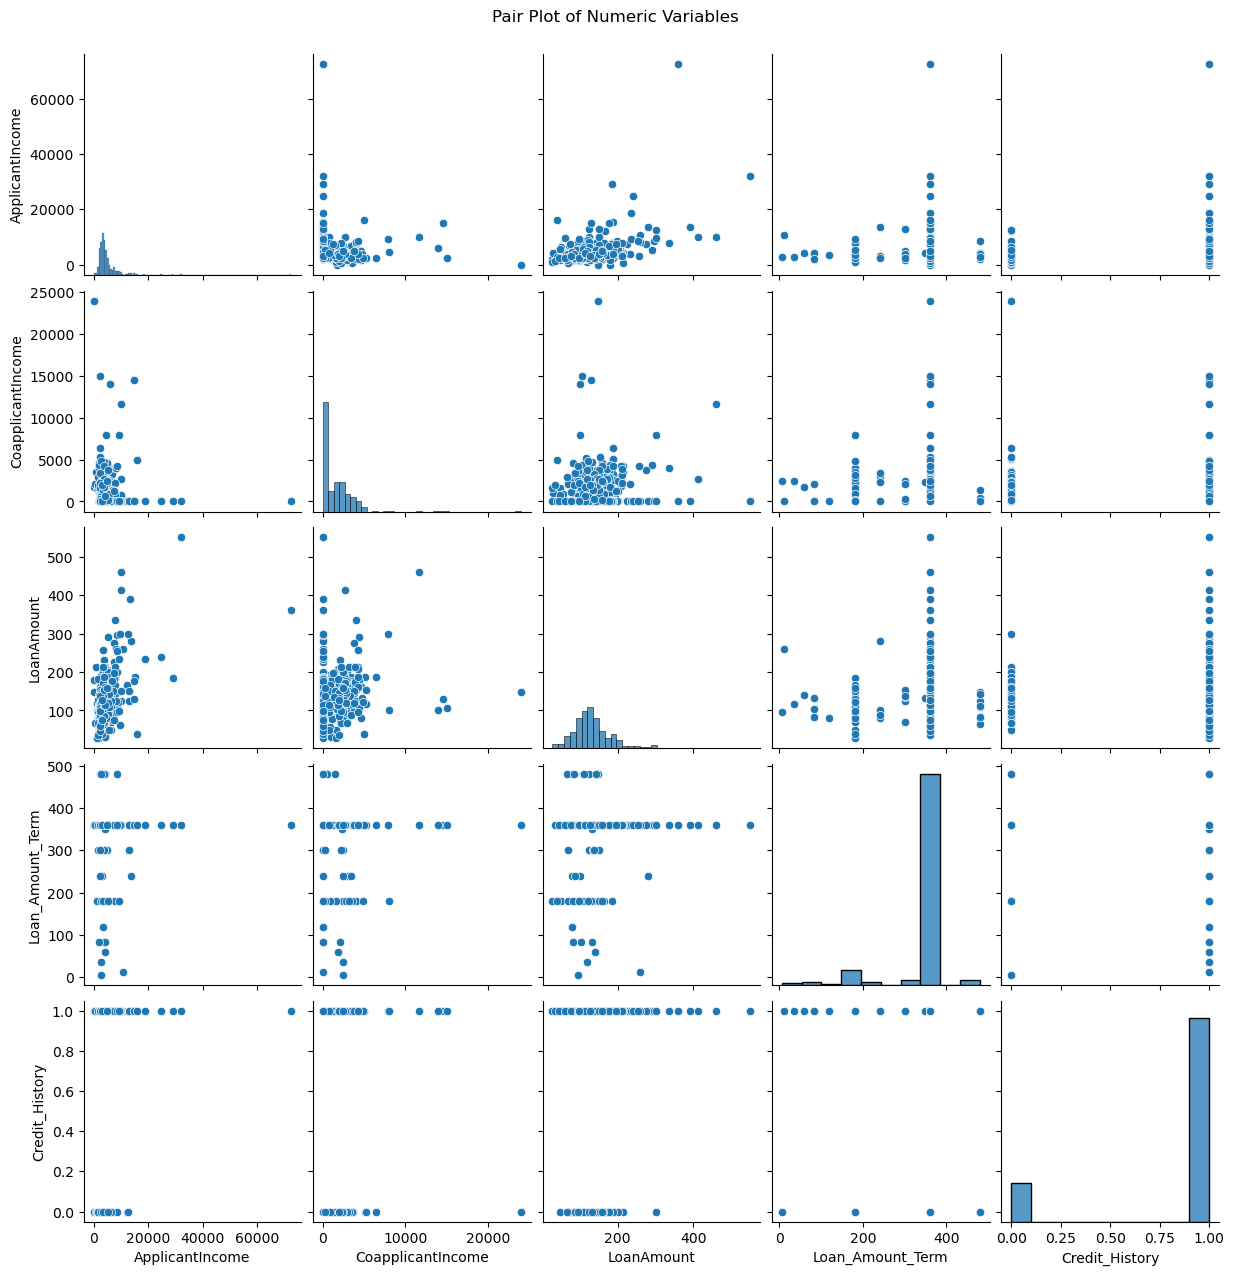

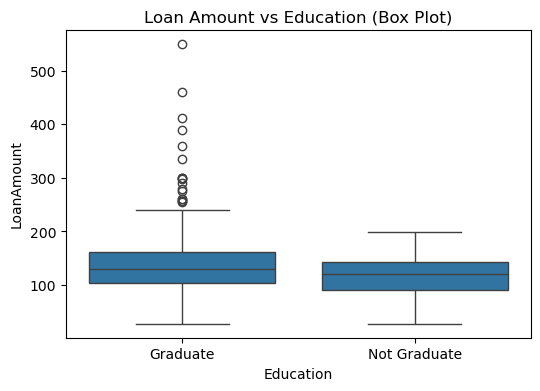

<function matplotlib.pyplot.show(close=None, block=None)>

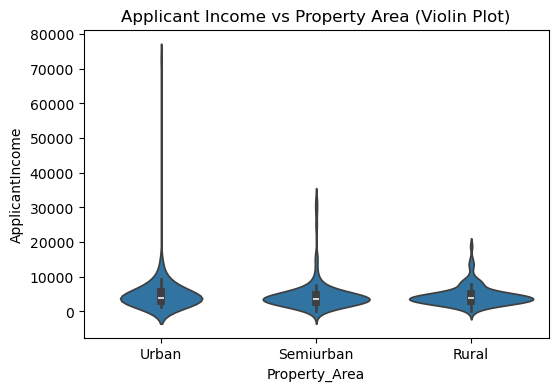

In [27]:
# 1. Scatter Plots
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="ApplicantIncome", y="LoanAmount")
plt.title("Applicant Income vs Loan Amount")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="CoapplicantIncome", y="LoanAmount")
plt.title("Coapplicant Income vs Loan Amount")
plt.show()

# 2. Pair Plot (Scatter Matrix)
sns.pairplot(df[numeric_cols].dropna())
plt.suptitle("Pair Plot of Numeric Variables", y=1.02)
plt.show()

# 3. Box Plots & Violin Plots
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Education", y="LoanAmount")
plt.title("Loan Amount vs Education (Box Plot)")
plt.show()

plt.figure(figsize=(6,4))
sns.violinplot(data=df, x="Property_Area", y="ApplicantIncome")
plt.title("Applicant Income vs Property Area (Violin Plot)")
plt.show

Multivariate Analysis

Correlation Matrix:
                    ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.110335    0.488737   
CoapplicantIncome        -0.110335           1.000000    0.150034   
LoanAmount                0.488737           0.150034    1.000000   
Loan_Amount_Term          0.023319          -0.008633    0.091867   
Credit_History            0.094944          -0.058004   -0.012932   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome            0.023319        0.094944  
CoapplicantIncome         -0.008633       -0.058004  
LoanAmount                 0.091867       -0.012932  
Loan_Amount_Term           1.000000       -0.048189  
Credit_History            -0.048189        1.000000  


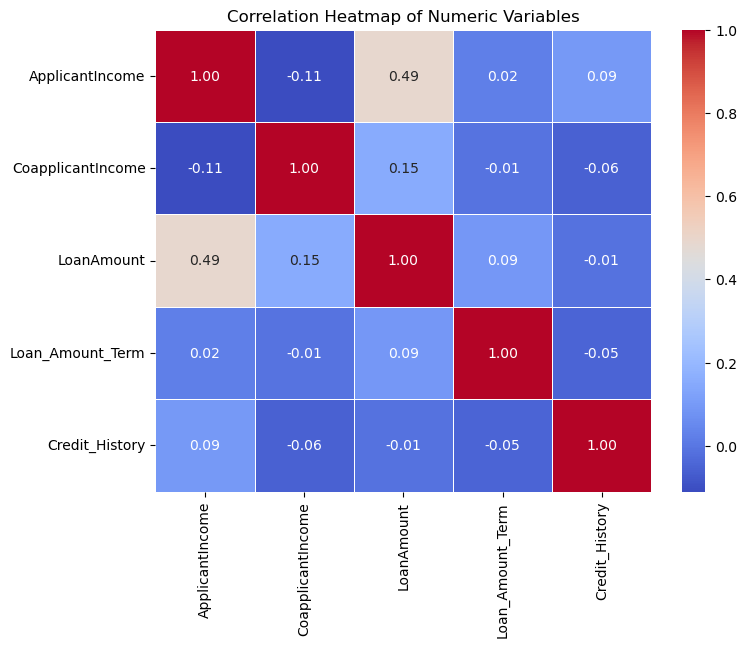

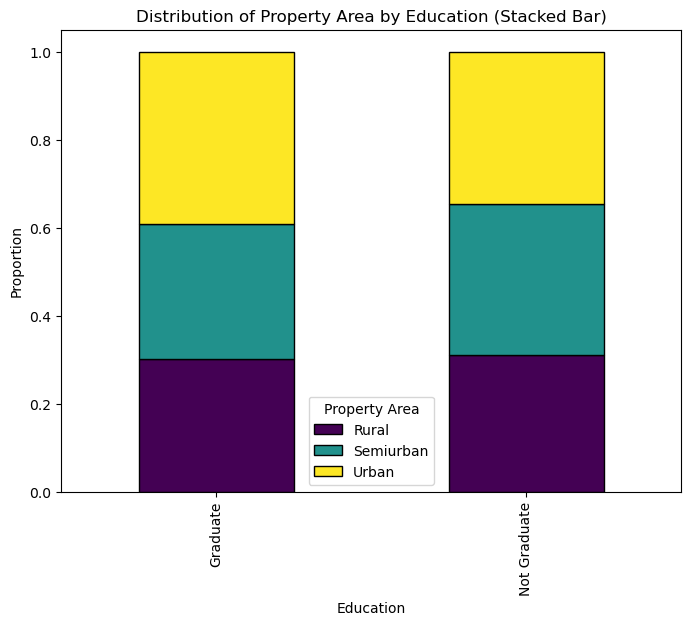

In [34]:
# 1. Correlation Analysis
# ==========================
numeric_cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History"]

corr = df[numeric_cols].corr()
print("Correlation Matrix:\n", corr)

# ==========================
# 2. Heatmap Visualization
# ==========================
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

# ==========================
# 3. Stacked Bar Chart for Categorical Variables
# Example: Education vs Property_Area
# ==========================
cross_tab = pd.crosstab(df["Education"], df["Property_Area"], normalize="index")

cross_tab.plot(kind="bar", stacked=True, figsize=(8,6), colormap="viridis", edgecolor="black")
plt.title("Distribution of Property Area by Education (Stacked Bar)")
plt.ylabel("Proportion")
plt.legend(title="Property Area")
plt.show()



### 📌 Business Insights from Loan Approval Analysis

Credit History is the Key Driver

Applicants with a positive credit history are far more likely to get loans approved.

👉 Company should prioritize credit history checks and consider offering special loan products for applicants with no/short credit history.

Income Distribution & Loan Demand

Applicant incomes are highly skewed — a few earn very high salaries but most fall in the low-to-mid income range.

👉 Company can design different loan slabs: small-ticket loans for low-income groups and premium offers for high-income clients.

Loan Amount & Outliers

LoanAmount shows outliers, meaning a few applicants request unusually high loans.

👉 High-value loans should undergo stricter risk assessment and possibly require additional collateral/security.

Demographic Trends

Majority of applicants are male, married, and salaried (not self-employed).

👉 Company can expand marketing to self-employed, women, and single applicants, as these segments are underrepresented but potential growth markets.

Loan Tenure Preferences

Most applicants prefer longer loan tenure (360 months).

👉 Offering flexible tenure options and incentives for shorter repayment periods can improve repayment speed and reduce risk.